<a href="https://colab.research.google.com/github/SandeebAdhikari/cs370-assignments/blob/main/assignment-2/Assignment1_Part2_Outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 3: Stochastic Gradient Descent (30 points)
In class we covered the baseline stochastic gradient descent. Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

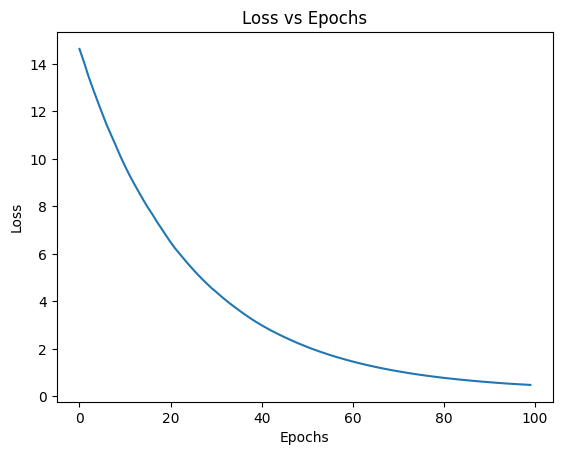

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(num_samples=100, noise=0.1):
    np.random.seed(42)
    X = 2 * np.random.rand(num_samples, 1)
    y = 4 + 3 * X + np.random.randn(num_samples, 1) * noise
    return X, y

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, epochs=100):
    m = len(y)
    cost_history = np.zeros(epochs)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index].reshape(1, -1)
            y_i = y[random_index].reshape(1, -1)
            prediction = np.dot(X_i, theta)
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((prediction - y_i)))
        cost_history[epoch] = compute_cost(X, y, theta)
    return theta, cost_history

# Generate some linear data
X, y = generate_linear_data()

# Hyperparameters
learning_rate = 0.01
epochs = 100

# Initial theta
theta = np.random.randn(2, 1)

# Add bias term to X
X_b = np.c_[np.ones((len(X), 1)), X]

# Run stochastic gradient descent
theta_final, cost_history = stochastic_gradient_descent(X_b, y, theta, learning_rate, epochs)

# Plot loss vs epoch
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


Problem 4: SGD Enhancements (30 points)
In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

Momentum (15 points)

Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

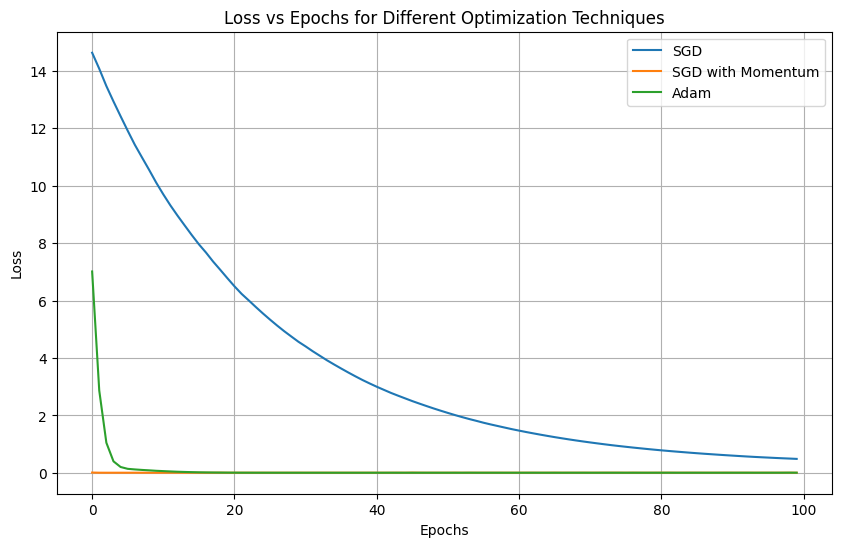

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(num_samples=100, noise=0.1):
    np.random.seed(42)
    X = 2 * np.random.rand(num_samples, 1)
    y = 4 + 3 * X + np.random.randn(num_samples, 1) * noise
    return X, y

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, epochs=100):
    m = len(y)
    cost_history = np.zeros(epochs)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index].reshape(1, -1)
            y_i = y[random_index].reshape(1, -1)
            prediction = np.dot(X_i, theta)
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((prediction - y_i)))
        cost_history[epoch] = compute_cost(X, y, theta)
    return theta, cost_history

def stochastic_gradient_descent_momentum(X, y, theta, learning_rate=0.01, epochs=100, momentum=0.9):
    m = len(y)
    cost_history = np.zeros(epochs)
    velocity = np.zeros_like(theta)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index].reshape(1, -1)
            y_i = y[random_index].reshape(1, -1)
            prediction = np.dot(X_i, theta)
            gradient = X_i.T.dot((prediction - y_i))
            velocity = momentum * velocity + learning_rate * gradient
            theta = theta - velocity
        cost_history[epoch] = compute_cost(X, y, theta)
    return theta, cost_history

def stochastic_gradient_descent_adam(X, y, theta, learning_rate=0.01, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = len(y)
    cost_history = np.zeros(epochs)
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index].reshape(1, -1)
            y_i = y[random_index].reshape(1, -1)
            prediction = np.dot(X_i, theta)
            gradient = X_i.T.dot((prediction - y_i))
            t += 1
            m_t = beta1 * m_t + (1 - beta1) * gradient
            v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)
            m_cap = m_t / (1 - (beta1 ** t))
            v_cap = v_t / (1 - (beta2 ** t))
            theta = theta - (learning_rate * m_cap) / (np.sqrt(v_cap) + epsilon)
        cost_history[epoch] = compute_cost(X, y, theta)
    return theta, cost_history

# Generate some linear data
X, y = generate_linear_data()

# Hyperparameters
learning_rate = 0.01
epochs = 100
momentum = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initial theta
theta = np.random.randn(2, 1)

# Add bias term to X
X_b = np.c_[np.ones((len(X), 1)), X]

# Run baseline SGD
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y, theta, learning_rate, epochs)

# Run SGD with momentum
theta_momentum, cost_history_momentum = stochastic_gradient_descent_momentum(X_b, y, theta, learning_rate, epochs, momentum)

# Run Adam optimization
theta_adam, cost_history_adam = stochastic_gradient_descent_adam(X_b, y, theta, learning_rate, epochs, beta1, beta2, epsilon)

# Plot loss vs epoch for all algorithms
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history_sgd, label='SGD')
plt.plot(range(epochs), cost_history_momentum, label='SGD with Momentum')
plt.plot(range(epochs), cost_history_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Optimization Techniques')
plt.legend()
plt.grid(True)
plt.show()
